## Demo code for Principal Components Analysis (PCA)

We'll use this notebook to demonstrate PCA on some toy data and image data.


In [1]:
import os, gzip
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

## Toy data examples

This is the code used to generate some of the first examples in the lecture slides.


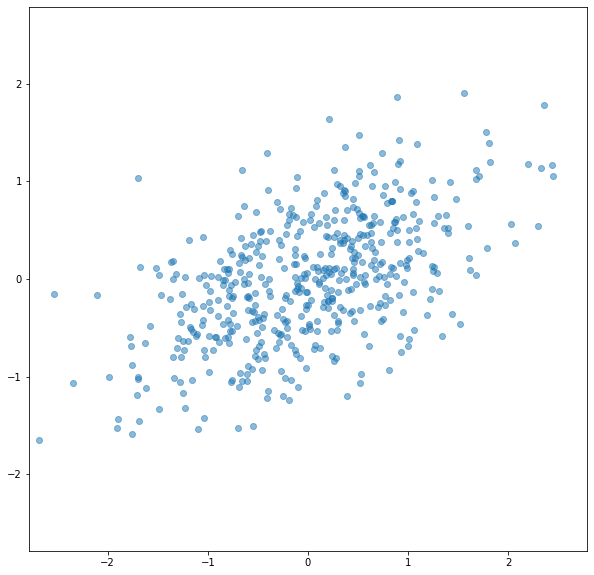

In [2]:
n = 500
X = np.matrix(np.random.normal(loc=0,size=2*n))
X = X.reshape(n, 2)
scale = .5
X[:,1] = scale * X[:,1]
theta = np.pi/6
R = np.matrix([np.cos(theta), np.sin(theta), -np.sin(theta), np.cos(theta)]).reshape(2,2)
X = X * R
X[:,0] = X[:,0] - np.mean(X[:,0])
X[:,1] = X[:,1] - np.mean(X[:,1])
plt.figure(figsize=(10,10))
plt.scatter(np.array(X[:,0]), np.array(X[:,1]), alpha=.5)
lim = np.max(np.abs(X))+.1
plt.xlim(-lim,lim)
_ = plt.ylim(-lim,lim)

In [3]:
pca = PCA().fit(X)
principal_vectors = pca.components_
principal_vectors[0]
pca.explained_variance_

array([0.94058615, 0.2366868 ])

In [4]:
principal_vectors

array([[-0.86676184, -0.49872229],
       [-0.49872229,  0.86676184]])

(-2.785112783674874, 2.785112783674874)

<Figure size 432x288 with 0 Axes>

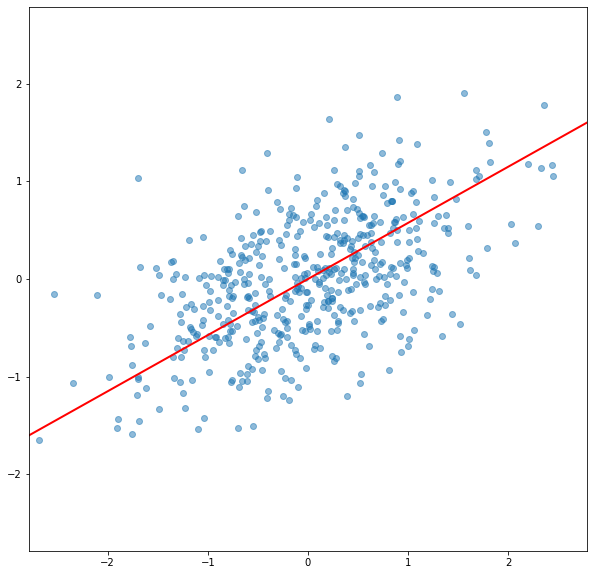

In [5]:
pc1 = principal_vectors[0]
slope = pc1[1]/pc1[0]
plt.figure()
plt.figure(figsize=(10,10))
plt.scatter(np.array(X[:,0]), np.array(X[:,1]), alpha=.5)
plt.plot([lim, -lim], [lim*slope, -lim*slope], color = 'r', linewidth=2)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

In [6]:
principal_vectors

array([[-0.86676184, -0.49872229],
       [-0.49872229,  0.86676184]])

In [7]:
# let's check that the principal vectors are orthogonal
np.dot(principal_vectors[0], principal_vectors[1])

0.0

## MNIST and Fashion MNIST

Next we'll run PCA on the MNIST and Fashion MNIST data.

We'll import the data from tensorflow. But you can also 
put the data in directories named `mnist` and `fashion-mnist` within the same directory as this notebook,
and use the provided helper functions.

You can download the data here:

MNIST   http://yann.lecun.com/exdb/mnist/<br>
FASHION-MNIST    https://github.com/zalandoresearch/fashion-mnist/tree/master/data/fashion

Download the following files:<br>
train-images-idx3-ubyte.gz<br>
train-labels-idx1-ubyte.gz<br>
t10k-images-idx3-ubyte.gz<br>
t10k-labels-idx1-ubyte.gz


In [8]:
# Define function that is used to read mnist and fashion mnist data

def load_data(dataset_name):
    data_dir = os.path.join("./", dataset_name)
        
    def extract_data(filename, num_data, head_size, data_size):
        with gzip.open(filename) as bytestream:
            bytestream.read(head_size)
            buf = bytestream.read(data_size * num_data)
            data = np.frombuffer(buf, dtype=np.uint8).astype(np.float)
        return data

    data = extract_data(data_dir + '/train-images-idx3-ubyte.gz', 60000, 16, 28 * 28)
    trX = data.reshape((60000, 28, 28))

    data = extract_data(data_dir + '/train-labels-idx1-ubyte.gz', 60000, 8, 1)
    trY = data.reshape((60000))

    data = extract_data(data_dir + '/t10k-images-idx3-ubyte.gz', 10000, 16, 28 * 28)
    teX = data.reshape((10000, 28, 28))

    data = extract_data(data_dir + '/t10k-labels-idx1-ubyte.gz', 10000, 8, 1)
    teY = data.reshape((10000))

    trY = np.asarray(trY)
    teY = np.asarray(teY)

    X = np.concatenate((trX, teX), axis=0)
    y = np.concatenate((trY, teY), axis=0).astype(np.int)

    seed = 409
    np.random.seed(seed)
    np.random.shuffle(X)
    np.random.seed(seed)
    np.random.shuffle(y)
    return X / 255., y    

In [9]:
def plot_images(images, titles, h, w, n_row=3, n_col=4, reversed=False):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        if reversed:
            plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        else:
            plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray.reversed())
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())


# MNIST

In [10]:
# load data
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
X = x_train
y = y_train

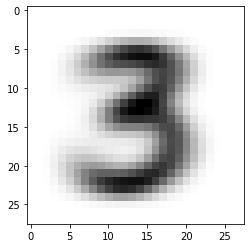

In [11]:
images = X[(y==3), :]
avgimg = images.mean(0)
_ = plt.imshow(avgimg.reshape((28, 28)), cmap=plt.cm.gray.reversed())

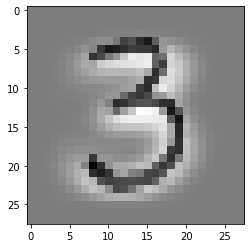

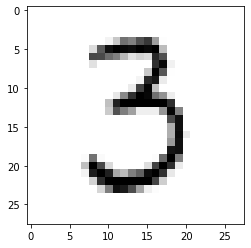

In [12]:
cimages = np.subtract(images, avgimg)
_ = plt.imshow(cimages[7].reshape((28, 28)), cmap=plt.cm.gray.reversed())
plt.show()
_ = plt.imshow(np.add(cimages[7], avgimg).reshape((28, 28)), cmap=plt.cm.gray.reversed())


In [13]:
height = cimages.shape[1]
width = cimages.shape[2]
cimages = cimages.reshape(cimages.shape[0], height*width)
cimages.shape

(6131, 784)

Variance explained by first 25 principal vectors: 72.42%


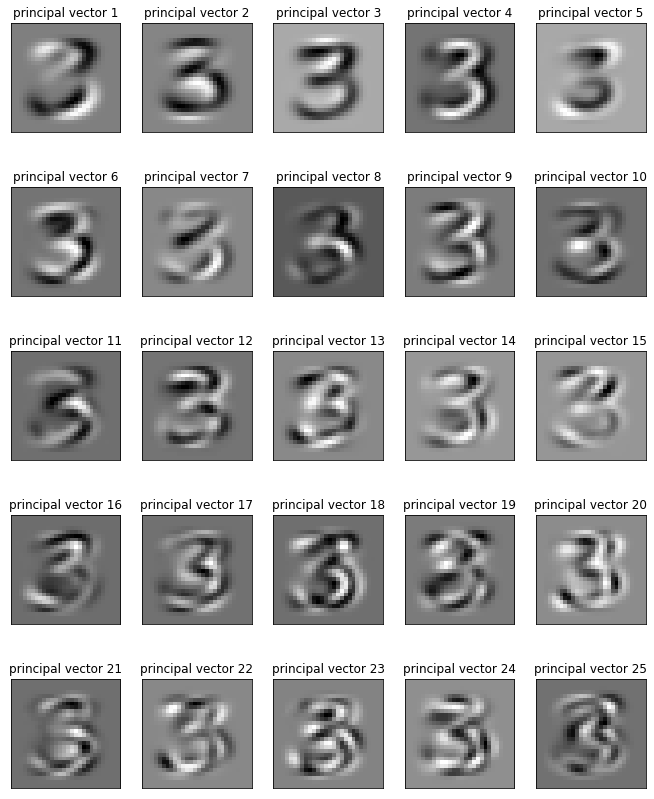

In [14]:
num_components = 25
pca = PCA(num_components).fit(cimages)
principal_vectors = pca.components_
principal_vectors = principal_vectors.reshape((num_components, height, width))
pcs = pca.fit_transform(cimages)
capprox = pca.inverse_transform(pcs)
labels = ['principal vector %d' % (i+1) for i in np.arange(num_components)]
plot_images(principal_vectors, labels, height, width, int(num_components/5.), 5)
ratio = pca.explained_variance_ratio_.sum()
print('Variance explained by first %d principal vectors: %.2f%%' % (num_components, ratio*100))

In [15]:
pcs.shape
cimages[0].shape
v = principal_vectors[0].reshape(784,1)
np.dot(cimages[0], v)
pcs[0]

array([ 936.71091343, -404.61829743,  894.59104315,  -91.93081418,
        -70.10951071,  146.25767348, -126.84460118, -260.00219109,
        437.65309344,    3.36924163,  -16.6494011 ,  -48.3744295 ,
        -90.97554344,  -23.98101283, -254.61197905,   69.51968079,
         11.35885939, -156.38876403,   18.47100138,  -33.40671189,
        169.9780192 ,   73.34832976,   -3.4759554 , -253.27396314,
        -52.01745988])

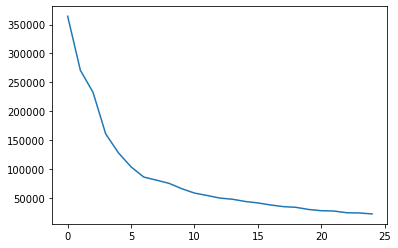

In [16]:
plt.plot(pca.explained_variance_)

In [17]:
approx = np.add(capprox, avgimg.reshape(height*width))

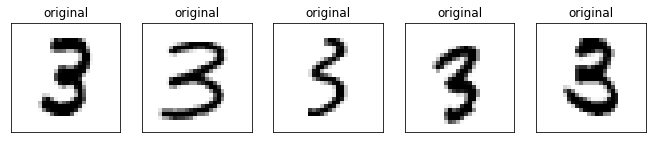

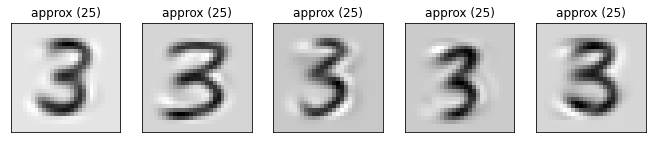

In [18]:
num_samples = 5
sample = np.random.choice(images.shape[0], num_samples)
plot_images(images[sample,:], ['original' for i in range(num_samples)], height, width, 1, num_samples)
plot_images(approx[sample,:], ['approx (%d)' % num_components for i in range(5)], height, width, 1, num_samples)


# Fashion-MNIST

In [19]:
# load data
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
X = x_train
y = y_train
height, width = (28, 28)
names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

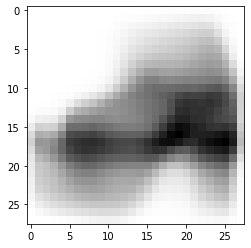

In [20]:
images = X[(y==5), :]
avgimg = images.mean(0)
_ = plt.imshow(avgimg.reshape((28, 28)), cmap=plt.cm.gray.reversed())

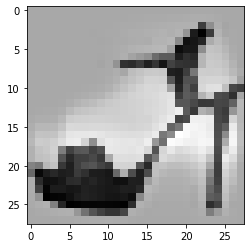

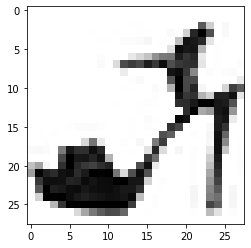

In [21]:
cimages = np.subtract(images, avgimg)
_ = plt.imshow(cimages[1].reshape((28, 28)), cmap=plt.cm.gray.reversed())
plt.show()
_ = plt.imshow(np.add(cimages[1], avgimg).reshape((28, 28)), cmap=plt.cm.gray.reversed())

In [22]:
height = cimages.shape[1]
width = cimages.shape[2]
cimages = cimages.reshape(cimages.shape[0], height*width)
cimages.shape

(6000, 784)

Variance explained by first 100 principal vectors: 86.50%


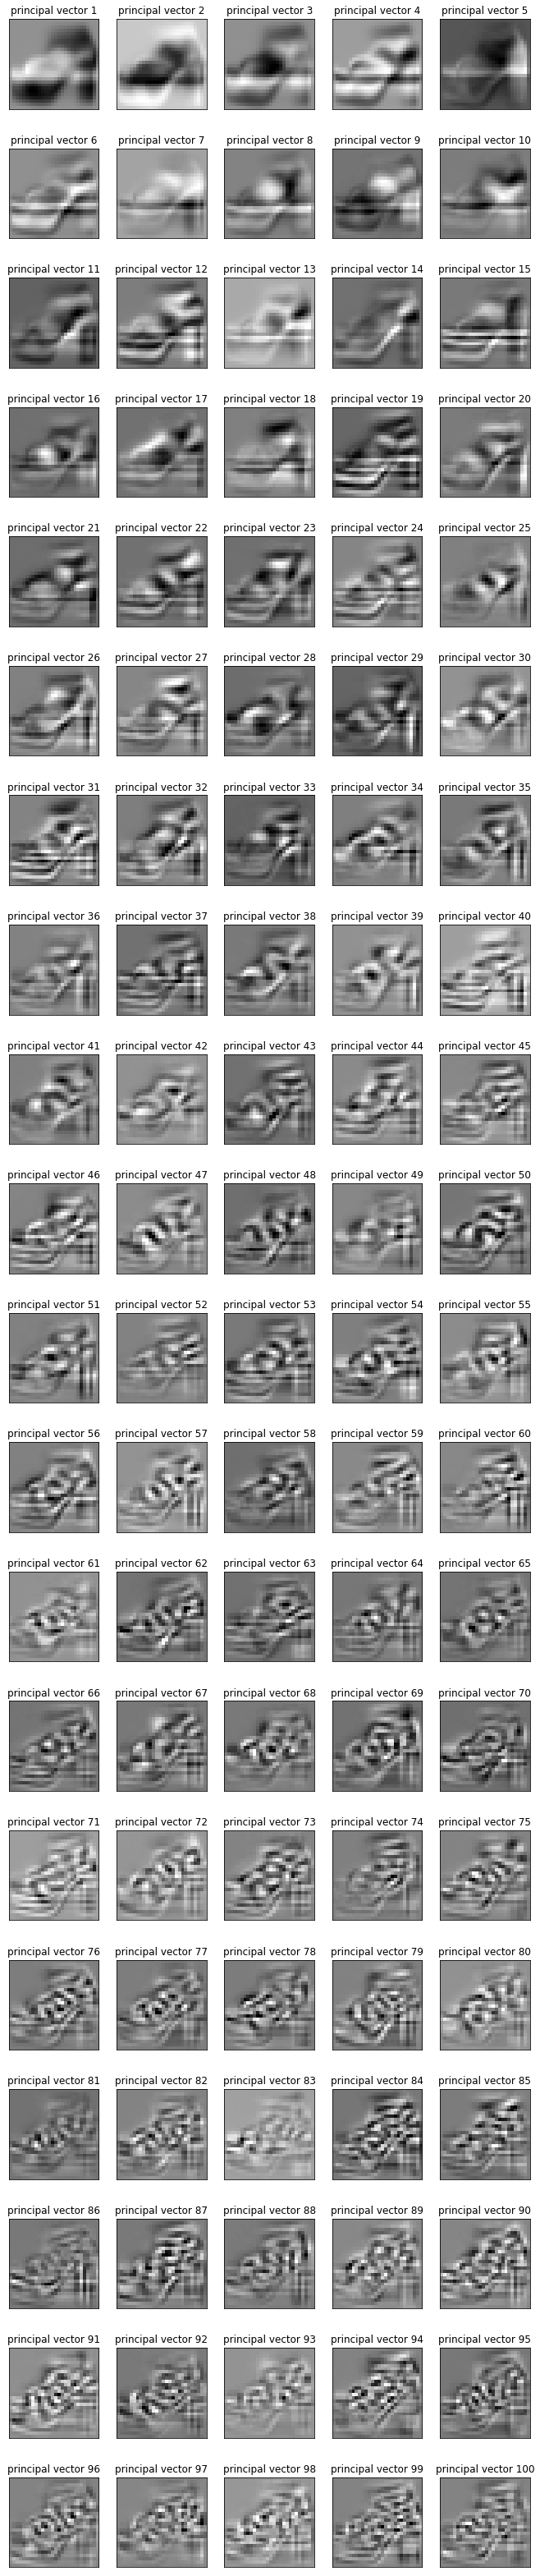

In [23]:
num_components = 100
pca = PCA(num_components).fit(cimages)
principal_vectors = pca.components_.reshape((num_components, height, width))
pcs = pca.fit_transform(cimages)
capprox = pca.inverse_transform(pcs)
labels = ['principal vector %d' % (i+1) for i in np.arange(num_components)]
plot_images(principal_vectors, labels, height, width, int(num_components/5.), 5)
ratio = pca.explained_variance_ratio_.sum()
print('Variance explained by first %d principal vectors: %.2f%%' % (num_components, ratio*100))

In [24]:
approx = np.add(capprox, avgimg.reshape(height*width))

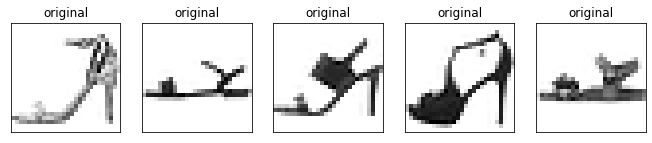

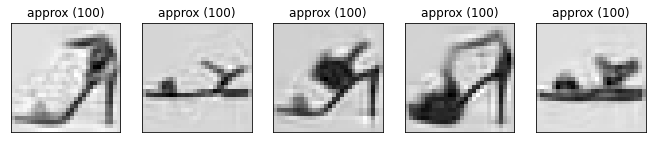

In [25]:
num_samples = 5
sample = np.random.choice(images.shape[0], num_samples)
plot_images(images[sample,:], ['original' for i in range(num_samples)], height, width, 1, num_samples)
plot_images(approx[sample,:], ['approx (%d)' % num_components for i in range(5)], height, width, 1, num_samples)


**labels**:
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot

## Face Data

Finally, we'll use the ["Labeled Faces in the Wild"](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_lfw_people.html) dataset.


In [26]:
from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
X = lfw_people.data
y = lfw_people.target
height, width = (50, 37)
lfw_people.target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair'], dtype='<U17')

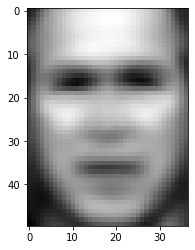

In [27]:
label = 3
images = X[(y==label),:]
avgimg = images.mean(0)
_ = plt.imshow(avgimg.reshape((height, width)), cmap=plt.cm.gray)

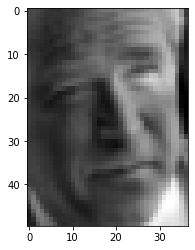

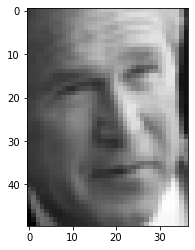

In [28]:
cimages = np.subtract(images, avgimg)
_ = plt.imshow(cimages[2].reshape((height, width)), cmap=plt.cm.gray)
plt.show()
_ = plt.imshow(np.add(cimages[2], avgimg).reshape((height, width)), cmap=plt.cm.gray)

George W Bush
Variance explained by first 50 principal vectors: 88.83%


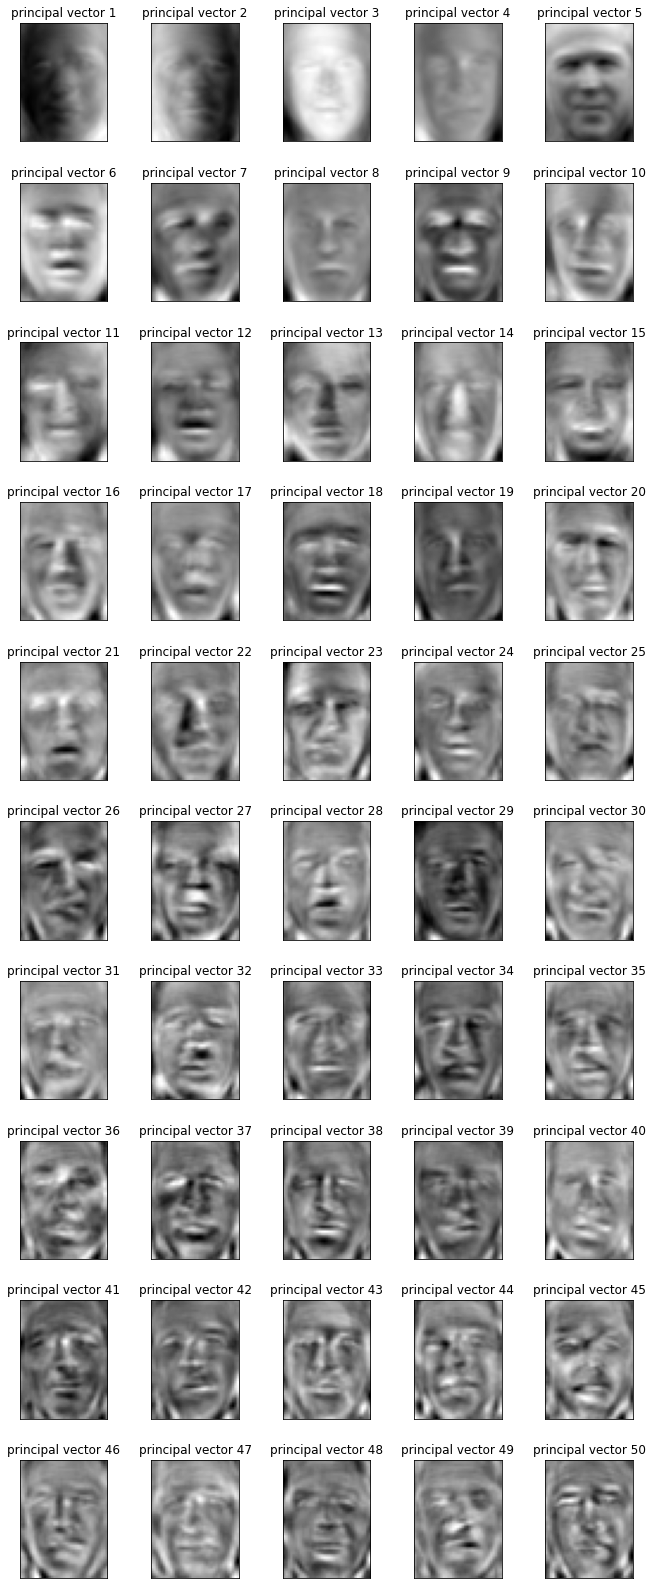

In [29]:
num_components = 50
pca = PCA(num_components).fit(cimages)
principal_vectors = pca.components_.reshape((num_components, height, width))
pcs = pca.fit_transform(cimages)
capprox = pca.inverse_transform(pcs)
labels = ['principal vector %d' % (i+1) for i in np.arange(num_components)]
plot_images(principal_vectors, labels, height, width, int(num_components/5.), 5, reversed=True)
ratio = pca.explained_variance_ratio_.sum()
print('%s' % lfw_people.target_names[label])
print('Variance explained by first %d principal vectors: %.2f%%' % (num_components, ratio*100))

In [30]:
approx = np.add(capprox, avgimg)

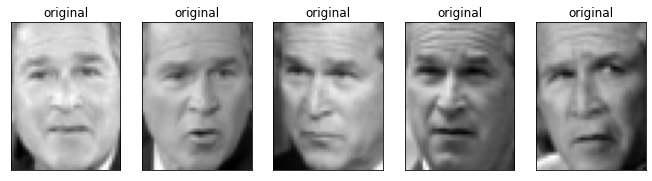

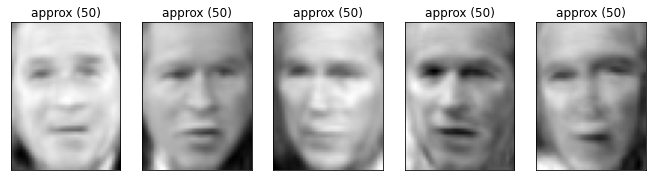

In [31]:
num_samples = 5
sample = np.random.choice(images.shape[0], num_samples)
plot_images(images[sample,:], ['original' for i in range(num_samples)], height, width, 1, num_samples, reversed=True)
plot_images(approx[sample,:], ['approx (%d)' % num_components for i in range(5)], height, width, 1, num_samples, reversed=True)